In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [291]:
df = pd.read_csv('/Users/mahdeeahmed/Python/Rough practice of python/pandas dataset/Control chart data.csv',header = 0, index_col=0)

In [292]:
df.head()

,1,2,3,4
1,12.11,12.15,12.09,12.09
2,12.10,12.12,12.09,12.14
3,12.11,12.10,12.11,12.13
4,12.08,12.11,12.15,12.12
5,12.10,12.12,12.11,12.12


In [293]:
df['x_bar']= df.mean(axis=1)

In [294]:
df

,1,2,3,4,x_bar
1,12.11,12.15,12.09,12.09,12.1100
2,12.10,12.12,12.09,12.14,12.1125
3,12.11,12.10,12.11,12.13,12.1125
4,12.08,12.11,12.15,12.12,12.1150
5,12.10,12.12,12.11,12.12,12.1125


In [295]:
x_double_bar = x_bar.mean()
x_double_bar

12.1176

In [296]:
df['max_range'] = df.max(axis=1)
df['min_range'] = df.min(axis= 1)
df['range'] = df['max_range'] - df['min_range']
r_bar = df['range'].mean()

In [297]:
r_bar

0.04600000000000044

In [298]:
df

,1,2,3,4,x_bar,max_range,min_range,range
1,12.11,12.15,12.09,12.09,12.1100,12.15,12.09,0.06
2,12.10,12.12,12.09,12.14,12.1125,12.14,12.09,0.05
3,12.11,12.10,12.11,12.13,12.1125,12.13,12.10,0.03
4,12.08,12.11,12.15,12.12,12.1150,12.15,12.08,0.07
5,12.10,12.12,12.11,12.12,12.1125,12.12,12.10,0.02


# Range chart limit creation

In [299]:
r_ucl = (2.28 * r_bar).round(3)
r_lcl = 0 * r_bar

In [300]:
print('Range bar UCL = ',r_ucl)
print('Range bar LCL = ',r_lcl)

Range bar UCL =  0.105
Range bar LCL =  0.0


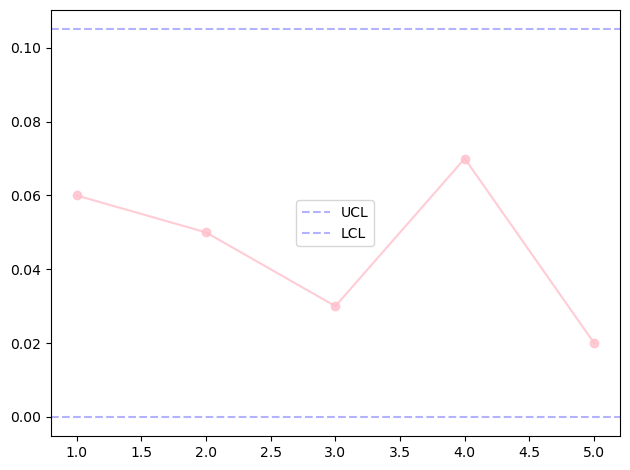

In [301]:
plt.axhline(y = r_lcl,linestyle = '--',label='UCL',color='b',alpha= .3)
plt.axhline(y = r_ucl,linestyle = '--',label='LCL',color='b',alpha= .3)

plt.plot(df['range'],marker = 'o',color = 'pink',alpha = .8)
plt.legend(loc=10)
plt.tight_layout()

# Creating a X- bar chart 

In [302]:
x_bar_ucl = x_double_bar + .73*r_bar
x_bar_lcl = x_double_bar - .73*r_bar

In [303]:
print('X bar UCL = ',x_bar_ucl)
print('X bar LCL = ',x_bar_lcl)

X bar UCL =  12.15118
X bar LCL =  12.084019999999999


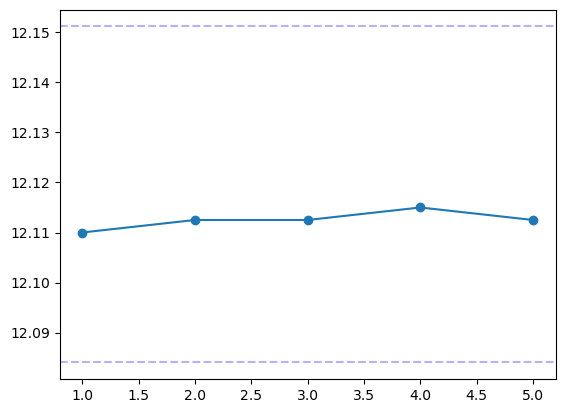

In [304]:
plt.axhline(y=x_bar_ucl,linestyle = '--',label='UCL',color='b',alpha = .3)
plt.axhline(y = x_bar_lcl,linestyle = '--',label='UCL',color='b',alpha = .3)


plt.plot(df['x_bar'],marker = 'o')

# Showing the plots together to find out if the process is in control 

Text(0, 0.5, 'Mean')

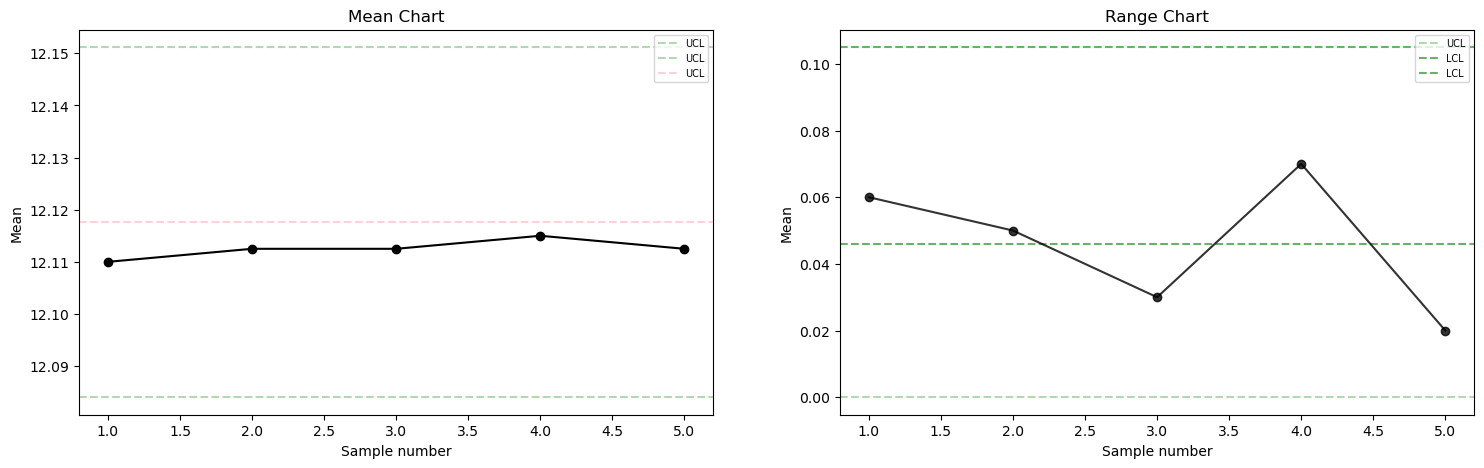

In [323]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize = [18,5])

ax[0].axhline(y=x_bar_ucl,linestyle = '--',label='UCL',color='g',alpha = .3)
ax[0].axhline(y = x_bar_lcl,linestyle = '--',label='UCL',color='g',alpha = .3)
ax[0].axhline(y = x_double_bar,linestyle = '--',label='UCL',color='pink',alpha = .7)

ax[0].plot(df['x_bar'],marker = 'o',color = 'black')
ax[0].legend(loc=1,fontsize= 7)
ax[0].set_title('Mean Chart')
ax[0].set_xlabel('Sample number')
ax[0].set_ylabel('Mean')




ax[1].axhline(y = r_lcl,linestyle = '--',label='UCL',color='g',alpha= .3)
ax[1].axhline(y = r_ucl,linestyle = '--',label='LCL',color='g',alpha= .6)
ax[1].axhline(y = r_bar,linestyle = '--',label='LCL',color='g',alpha= .6)

ax[1].plot(df['range'],marker = 'o',color = 'black',alpha = .8)
ax[1].legend(loc=1,fontsize= 7)
ax[1].set_title('Range Chart')
ax[1].set_xlabel('Sample number')
ax[1].set_ylabel('Mean')


# Final conclusion 

### 1. The process average (Mean chart) suggest a randomness
### 2. The process dispersion (Range chart) also suggest a randomness.
### In both cases, the variables are in statistical control unit suggesting there is no need for corrective actions!